## Online Retail Insights: Exploring Customer Patterns and Market Trends using FPGrowth Algorithm and Cohort Analysis

In [1]:
import pandas as pd
from fim import fpgrowth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings as w
w.filterwarnings('ignore')

### STEP 1: Loading and pre-processing the Data

In [2]:
df = pd.read_excel(r"C:\Users\konch\Downloads\archive (1)\online_retail_II.xlsx")

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


### STEP 2: EDA

In [4]:
df = df.dropna()


In [5]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Recency"] = (df["InvoiceDate"].max() - df["InvoiceDate"]).dt.days
df["Order_Sum"] = df["Quantity"] * df["Price"]
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
df["Customer ID"] = pd.to_numeric(df["Customer ID"], downcast= 'integer')
df['Total Value'] = df.groupby(df['Customer ID'])['Order_Sum'].transform('sum')
df['Basket Size'] = df.groupby(['Customer ID', 'Invoice'])['Quantity'].transform('sum')
df['Average Basket'] = df.groupby(df['Customer ID'])['Basket Size'].transform('mean').round(2)

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Order_Sum,Total Value,Basket Size,Average Basket
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,373,83.4,2017.2,166,145.77
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,373,81.0,2017.2,166,145.77
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,373,81.0,2017.2,166,145.77
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,373,100.8,2017.2,166,145.77
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,373,30.0,2017.2,166,145.77


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         407664 non-null  object        
 1   StockCode       407664 non-null  object        
 2   Description     407664 non-null  object        
 3   Quantity        407664 non-null  int64         
 4   InvoiceDate     407664 non-null  datetime64[ns]
 5   Price           407664 non-null  float64       
 6   Customer ID     407664 non-null  int16         
 7   Country         407664 non-null  object        
 8   Recency         407664 non-null  int64         
 9   Order_Sum       407664 non-null  float64       
 10  Total Value     407664 non-null  float64       
 11  Basket Size     407664 non-null  int64         
 12  Average Basket  407664 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int16(1), int64(3), object(4)
memory usage: 41.2+ MB


Text(0.5, 1.0, 'Top 5 Countries by Orders')

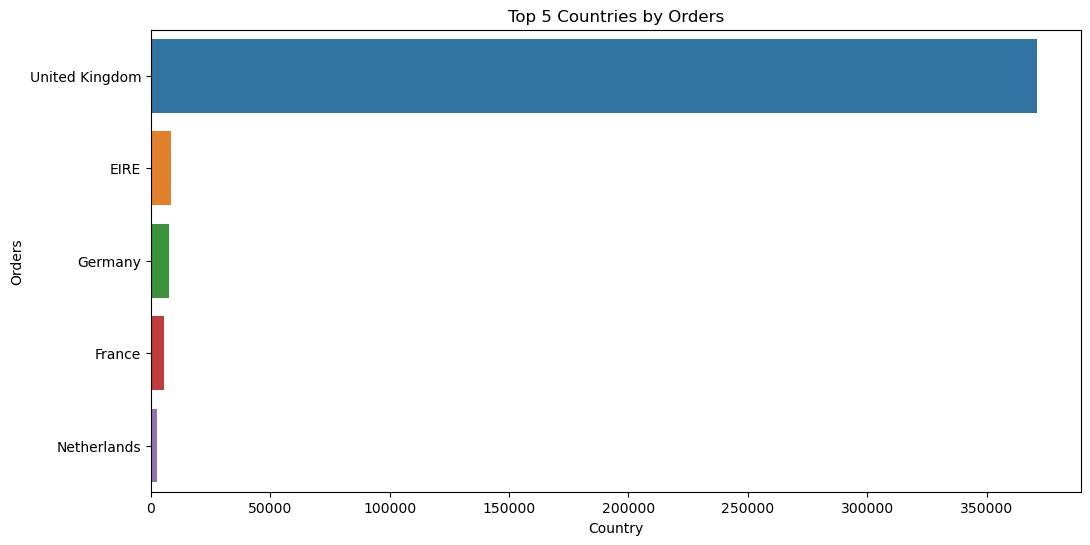

In [8]:
top_country = df['Country'].value_counts().nlargest(5)
plt.figure(figsize=(12,6))
sns.barplot( x=top_country, y=top_country.index, palette='tab10')
plt.xlabel('Country')
plt.ylabel('Orders')
plt.title('Top 5 Countries by Orders')

Text(0.5, 1.0, 'Top 5 Customers by Value')

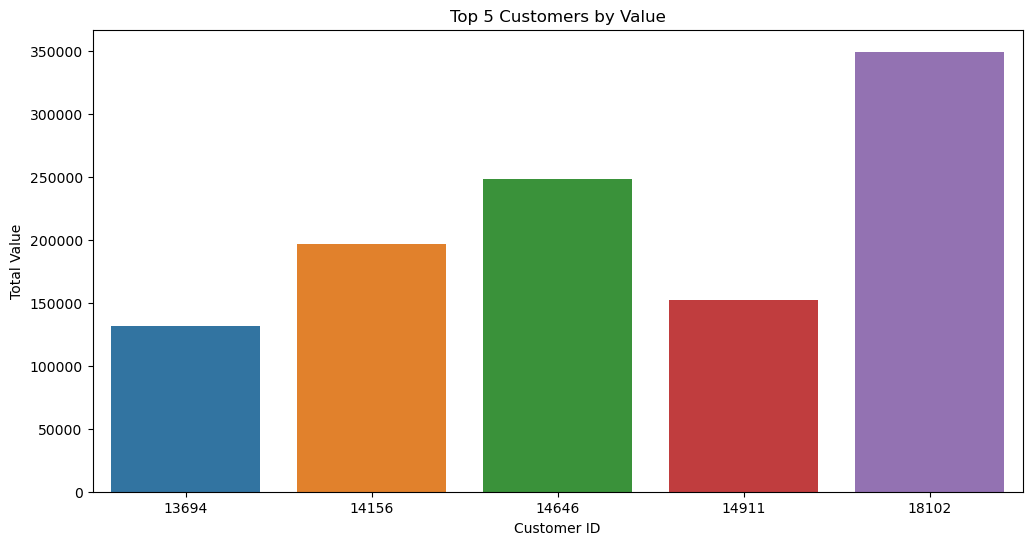

In [9]:
sorted_df = df.sort_values(by='Total Value', ascending=False)
top_5_customers = sorted_df.drop_duplicates(subset='Total Value').head(5)
plt.figure(figsize=(12,6))
sns.barplot( data= top_5_customers, x='Customer ID', y='Total Value', palette='tab10')
plt.xlabel('Customer ID')
plt.ylabel('Total Value')
plt.title('Top 5 Customers by Value')

Text(0.5, 1.0, 'Distribution of Total Money Spent up to 10000 LTV')

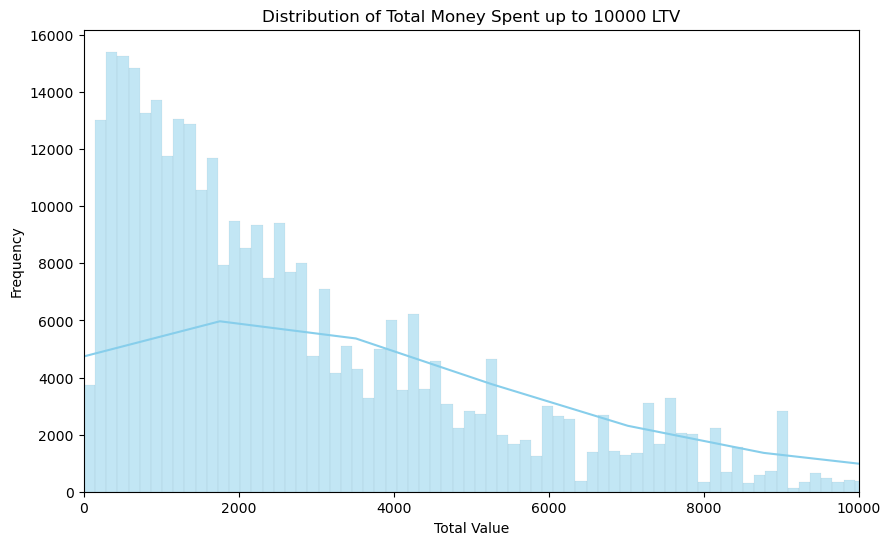

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Value'], kde=True, color='skyblue')
plt.xlim(0,10000)
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Money Spent up to 10000 LTV')


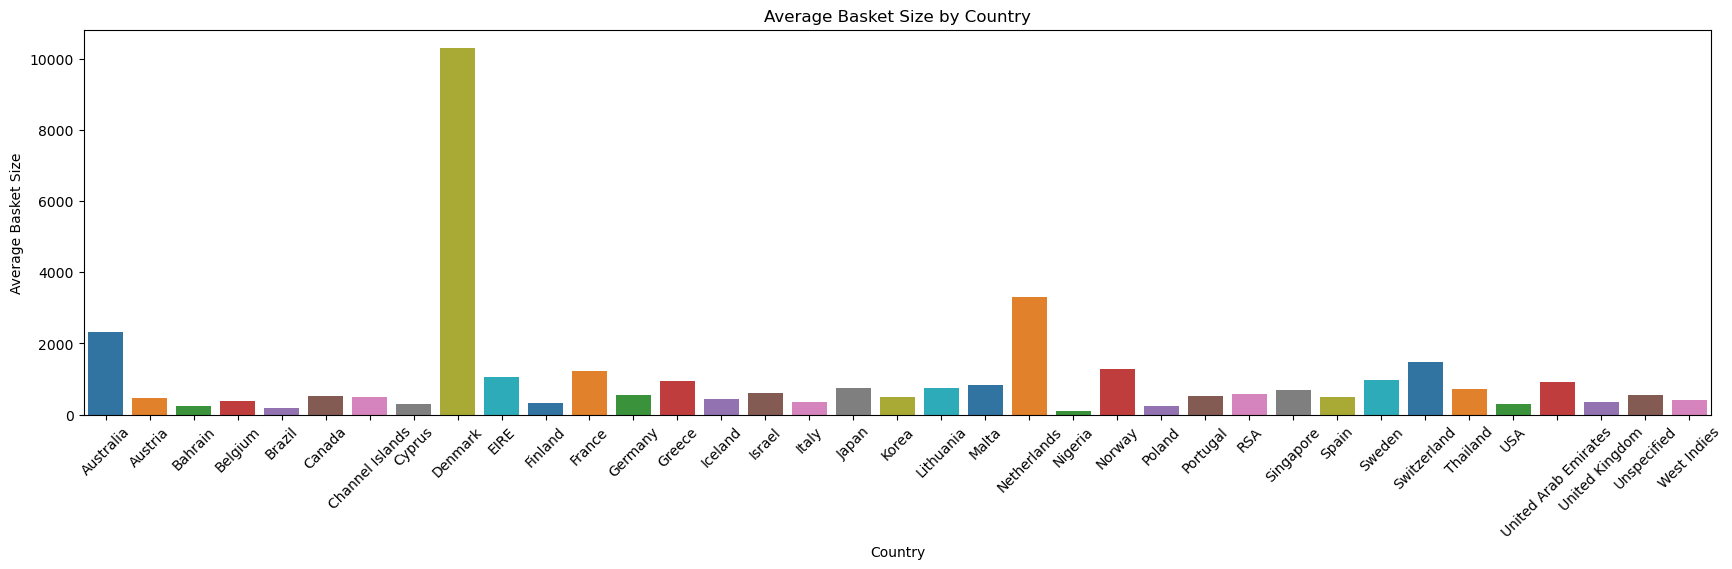

In [11]:
average_basket_by_country = df.groupby('Country')['Basket Size'].mean()

plt.figure(figsize=(21, 5))
sns.barplot(x=average_basket_by_country.index, y=average_basket_by_country.values, palette='tab10')
plt.xlabel('Country')
plt.ylabel('Average Basket Size')
plt.title('Average Basket Size by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


### STEP 3: Dividing customers into 4 cohorts by Total Revenue and Average Basket Size

In [12]:
num_cohorts = 4

In [13]:
median_spend = df['Total Value'].median()


In [14]:
median_basket = df['Average Basket'].median()

In [15]:
def assign_cohort(spend, avg_basket_size):
    if spend >= median_spend and avg_basket_size >= median_basket:
        return 'High Spender, High Basket'
    elif spend >= median_spend and avg_basket_size < median_basket:
        return 'High Spender, Low Basket'
    elif spend < median_spend and avg_basket_size >= median_basket:
        return 'Low Spender, High Basket'
    else:
        return 'Low Spender, Low Basket'

In [16]:
df['Cohort'] = df.apply(lambda row: assign_cohort(row['Total Value'], row['Average Basket']), axis=1)

Text(0.5, 1.0, 'Distribution of Customer Cohorts')

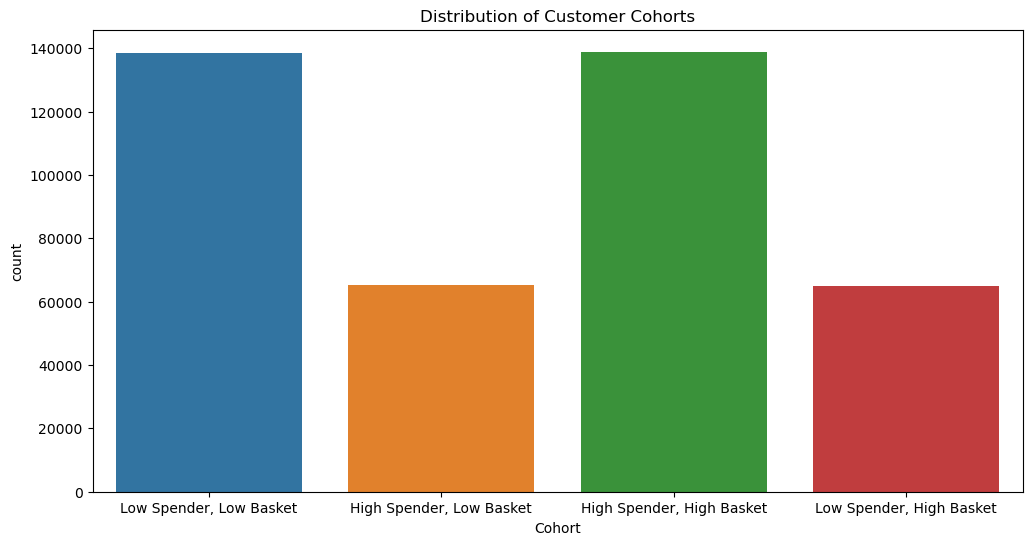

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Cohort'])
plt.title('Distribution of Customer Cohorts')

Text(0.5, 1.0, 'Average Total Value by Cohort')

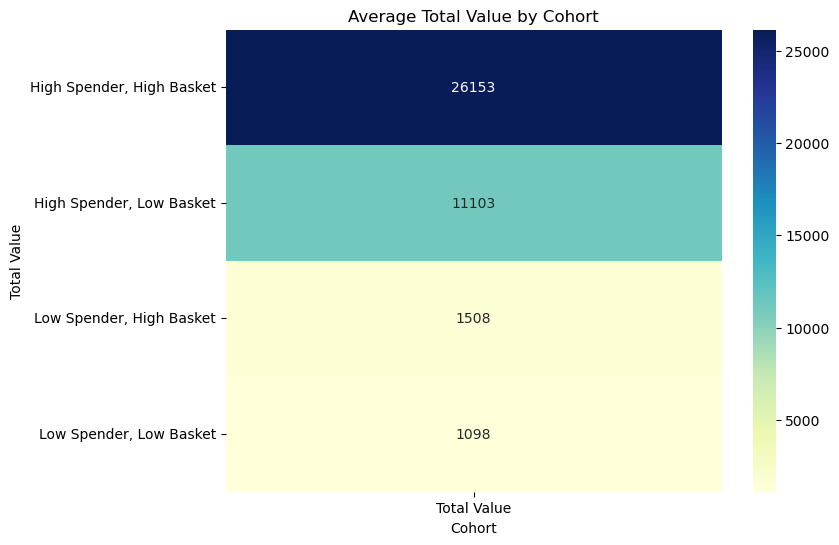

In [52]:
plt.figure(figsize=(8, 6))
average_total_value = df.groupby('Cohort')['Total Value'].mean().reset_index()
heatmap_data = average_total_value.pivot_table(index='Cohort', values='Total Value', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)
plt.xlabel('Cohort')
plt.ylabel('Total Value')
plt.title('Average Total Value by Cohort')



### Step 4: Predicting Top 10 items to promote to each Cohort

In [40]:
supp = 3
conf = 50


In [41]:
df.groupby('Invoice')['Description'].count()

Invoice
489434     8
489435     4
489436    19
489437    23
489438    17
          ..
538167    25
538168    30
538169    13
538170    25
538171    65
Name: Description, Length: 19213, dtype: int64

In [42]:
transactions = df.groupby('Invoice')['Description'].apply(list)
transactions_list = transactions.to_list()
patterns = fpgrowth(transactions_list, supp= supp, conf=conf)
patterns_df = pd.DataFrame(patterns, columns=['Itemset', 'Support'])
patterns_df = patterns_df[patterns_df['Support'] >= supp] 

In [43]:
hh_patterns = patterns_df[df['Cohort'] == 'High Spender, High Basket']
hl_patterns = patterns_df[df['Cohort'] == 'High Spender, Low Basket']
lh_patterns = patterns_df[df['Cohort'] == 'Low Spender, High Basket']
ll_patterns = patterns_df[df['Cohort'] == 'Low Spender, Low Basket']



In [44]:

def calculate_top_items_for_sale(cohort_patterns):
    top_items = cohort_patterns.nlargest(10, 'Support')['Itemset']
    return top_items



In [45]:
hh_top_items = calculate_top_items_for_sale(hh_patterns)
print("Top 10 items for High Spenders, High Basket:")
print(hh_top_items)

Top 10 items for High Spenders, High Basket:
59    (HANGING HEART ZINC T-LIGHT HOLDER,)
78                              (POSTAGE,)
58      (JUMBO BAG PINK WITH WHITE SPOTS,)
54       (RED WOOLLY HOTTIE WHITE HEART.,)
64                        (PARTY BUNTING,)
60      (NATURAL SLATE HEART CHALKBOARD ,)
57    (RETRO SPOT TEA SET CERAMIC 11 PC ,)
65              (CREAM HEART CARD HOLDER,)
75      (ANTIQUE SILVER TEA GLASS ETCHED,)
55            (PACK OF 6 BIRDY GIFT TAGS,)
Name: Itemset, dtype: object


In [46]:
hl_top_items = calculate_top_items_for_sale(hl_patterns)
print("Top 10 items for High Spenders, Low Basket:")
print(hl_top_items)

Top 10 items for High Spenders, Low Basket:
17              (JUMBO BAG RED RETROSPOT,)
18          (WOODEN FRAME ANTIQUE WHITE ,)
16                (HEART OF WICKER LARGE,)
14     (RED HANGING HEART T-LIGHT HOLDER,)
12              (LUNCH BAG  BLACK SKULL.,)
15               (JUMBO STORAGE BAG SUKI,)
19             (LOVE BUILDING BLOCK WORD,)
21    (JUMBO SHOPPER VINTAGE RED PAISLEY,)
25        (BAKING SET 9 PIECE RETROSPOT ,)
24                 (JUMBO BAG STRAWBERRY,)
Name: Itemset, dtype: object


In [47]:
ll_top_items = calculate_top_items_for_sale(ll_patterns)
print("Top 10 items for Low Spenders, Low Basket:")
print(ll_top_items)

Top 10 items for Low Spenders, Low Basket:
0     (WHITE HANGING HEART T-LIGHT HOLDER,)
1               (REGENCY CAKESTAND 3 TIER,)
3         (STRAWBERRY CERAMIC TRINKET BOX,)
5          (ASSORTED COLOUR BIRD ORNAMENT,)
7               (HOME BUILDING BLOCK WORD,)
4       (PACK OF 72 RETRO SPOT CAKE CASES,)
2            (60 TEATIME FAIRY CAKE CASES,)
9                   (LUNCH BAG RED SPOTTY,)
6           (REX CASH+CARRY JUMBO SHOPPER,)
11               (LUNCH BAG SUKI  DESIGN ,)
Name: Itemset, dtype: object


In [48]:
lh_top_items = calculate_top_items_for_sale(lh_patterns)
print("Top 10 items for Low Spenders, High Basket:")
print(lh_top_items)

Top 10 items for Low Spenders, High Basket:
Series([], Name: Itemset, dtype: object)


No matter how low values we set for support and confidence, the 'Low Spender, High Basket' cohort fails to produce any patterns. This Cohort might be inherently different from the others in a way that makes it harder to find patterns. This could be due to various factors related to their buying behavior